<a href="https://colab.research.google.com/github/leogalbu/Colab_Notebook/blob/Image_Classification/Multiclass_Food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import and load the data

In [24]:
# Import libraries
import zipfile
import os
import random
import pathlib
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing.image import ImageDataGenerator


In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2022-09-01 12:00:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 172.253.122.128, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   239MB/s    in 2.1s    

2022-09-01 12:00:54 (239 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
# Explore the dataset
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"the are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

  # 10 class, 750 images in training and 250 in test

the are 2 directories and 0 images in '10_food_classes_all_data'
the are 10 directories and 0 images in '10_food_classes_all_data/test'
the are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
the are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
the are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
the are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
the are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
the are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
the are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
the are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
the are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
the are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
the are 10 directories and 0 images in '10_foo

In [4]:
# Setup the train and test directories
train_dir  = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [8]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names);

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [22]:
# Visualize random image
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


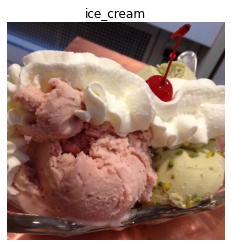

In [23]:
img = view_random_image(train_dir, random.choice(class_names))

## Preprocess Data

In [28]:
# Rescale the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# load the data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
